<a href="https://colab.research.google.com/github/NICO222dtn/AVOCADO/blob/main/AirBnB_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb Rental Valuation**

Welcome to Airbnb Analysis Corp.! Your task is to set the competitive **daily accomodation rate** for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a **fair value** that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!


1. The owner has been a host since **August 2010**
1. The location is **lon:151.274506, lat:33.889087**
1. The current review score rating **95.0**
1. Number of reviews **53**
1. Minimum nights **4**
1. The house can accommodate **10** people.
1. The owner currently charges a cleaning fee of **370**
1. The house has **3 bathrooms, 5 bedrooms, 7 beds**.
1. The house is available for **255 of the next 365 days**
1. The client is **verified**, and they are a **superhost**.
1. The cancellation policy is **strict with a 14 days grace period**.
1. The host requires a security deposit of **$1,500**


*All values strictly apply to the month of July 2018*

In [ ]:
from dateutil import parser
dict_client = {}

dict_client["city"] = "Bondi Beach"
dict_client["longitude"] = 151.274506
dict_client["latitude"] = -33.889087
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 4
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 3
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["security_deposit"] = 1500
dict_client["cleaning_fee"] = 370
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_365"] = 255
dict_client["host_identity_verified"] = 1  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 1
dict_client["cancellation_policy"] = "strict_14_with_grace_period"
dict_client["host_since"] = parser.parse("01-08-2010")



# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    except:
        plt.savefig(fig_id + "." + fig_extension, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.display.max_columns = None

# Get the data

In [ ]:
import pandas as pd
## This is simply a bit of importing logic that you don't have ..
## .. to concern yourself with for now.

from pathlib import Path

github_p = "https://storage.googleapis.com/public-quant/course//content/"

my_file = Path("sydney_airbnb.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")
    df = pd.read_csv('sydney_airbnb.csv')
else:
    print("Be patient: loading from database (2 minutes)")
    df = pd.read_csv(github_p+'sydney_airbnb.csv')
    print("Done")

Be patient: loading from database (2 minutes)


<ipython-input-3-1a096963100c>:15: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(github_p+'sydney_airbnb.csv')


Done


In [ ]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,As much as they want.,Be considerate. No showering after 2330h.,https://a0.muscache.com/im/pictures/2797669/17...,40855,https://www.airbnb.com/users/show/40855,Colleen,23/09/09,"Potts Point, New South Wales, Australia","Recently retired, I've lived & worked on 4 con...",within a day,67%,t,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Potts Point, NSW, Australia",Potts Point,Sydney,NaN,Potts Point,NSW,2011,Sydney,"Potts Point, Australia",AU,Australia,-33.869168,151.226562,t,Apartment,Private room,1,NaN,1.0,1.0,Real Bed,"{TV,Kitchen,Elevator,""Buzzer/wireless intercom...",NaN,$65.00,NaN,NaN,NaN,NaN,1,$0.00,2,180,4 weeks ago,t,9,39,69,339,177,5/12/09,1/07/18,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,As much or as little as you like. We live here...,We look forward to welcoming you to stay you j...,https://a0.muscache.com/im/pictures/763ad5c8-c...,17061,https://www.airbnb.com/users/show/17061,Stuart,14/05/09,"Sydney, New South Wales, Australia","G'Day from Australia!\r\n\r\nHe's Vinh, and I'...",within an hour,100%,f,https://a0.muscache.com/im/users/17061/profile...,https://a0.muscache.com/im/users/17061/profile...,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Pyrmont, NSW, Australia",Pyrmont,Sydney,NaN,Pyrmont,NSW,2009,Sydney,"Pyrmont, Australia",AU,Australia,-33.865153,151.191896,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",NaN,$98.00,$800.00,NaN,$0.00,$55.00,2,$395.00,2,7,yesterday,t,13,30,45,188,468,24/07/10,27/06/18,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully reno

In [ ]:
### To make this project easier, I will select only a small number of features
incl = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee","accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", "host_is_superhost","host_since","cancellation_policy"]
df = df[incl]

Lets reformat the price to floats, it is currently a string (object). And lets makes sure the date is in a datetime format.

In [ ]:
df[["price"]].head()

,price
0,$65.00
1,$98.00
2,$469.00
3,$63.00
4,$39.00


In [ ]:
import re
price_list = ["price","cleaning_fee","security_deposit"]

for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

df['host_since'] = pd.to_datetime(df['host_since'])

<ipython-input-7-0acd20ed9d9e>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['host_since'] = pd.to_datetime(df['host_since'])


In [ ]:
df["price"].head()

,price
0,65.0
1,98.0
2,469.0
3,63.0
4,39.0


<Axes: >

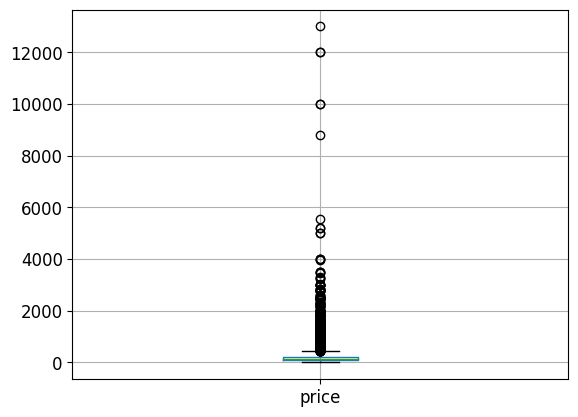

In [ ]:
## Winsorize for high price values, outliers.

df.boxplot(column="price")

In [ ]:
## this is high, because we have a price we expect it to be high.
## however, it shouldn't be much above 3.
df["price"].skew()

13.808558337216192

In [ ]:
# df["price"]].clip(low_entry, high_entry)

In [ ]:
df["price"].max()

12999.0

In [ ]:
## This value is still relatively high
df["price"].quantile(0.995) ## @99.5%

1600.0

In [ ]:
df = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)

In [ ]:
## This would do for now, it might also be worth transforming ..
## .. the price with a log function at a later stage
df["price"].skew()

2.957872457159033

In [ ]:
df.isnull().sum()

,0
price,0
city,32
longitude,0
latitude,0
review_scores_rating,7466
number_of_reviews,0
minimum_nights,0
security_deposit,0
cleaning_fee,0
accommodates,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26931 entries, 0 to 26930
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   26931 non-null  float64       
 1   city                    26899 non-null  object        
 2   longitude               26931 non-null  float64       
 3   latitude                26931 non-null  float64       
 4   review_scores_rating    19465 non-null  float64       
 5   number_of_reviews       26931 non-null  int64         
 6   minimum_nights          26931 non-null  int64         
 7   security_deposit        26931 non-null  float64       
 8   cleaning_fee            26931 non-null  float64       
 9   accommodates            26931 non-null  int64         
 10  bathrooms               26909 non-null  float64       
 11  bedrooms                26923 non-null  float64       
 12  beds                    26898 non-null  float6

In [ ]:
df["availability_365"].value_counts()

,count
availability_365,
0,11492
365,743
364,476
89,414
90,324
...,...
214,11
230,11
259,10


In [ ]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_since
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000,26897
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,293.870261,65.268687,3.357395,1.340964,1.600787,1.996542,101.575916,2015-02-08 18:54:11.604268032
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2009-01-10 00:00:00
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2014-01-12 00:00:00
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.000000,2015-03-31 00:00:00
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,400.000000,99.000000,4.000000,1.500000,2.000000,2.000000,179.000000,2016-05-01 00:00:00
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000,2018-12-01 00:00:00
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,549.642202,84.886663,2.160004,0.638187,1.091213,1.506535,127.822623,NaN


Saving figure attribute_histogram_plots


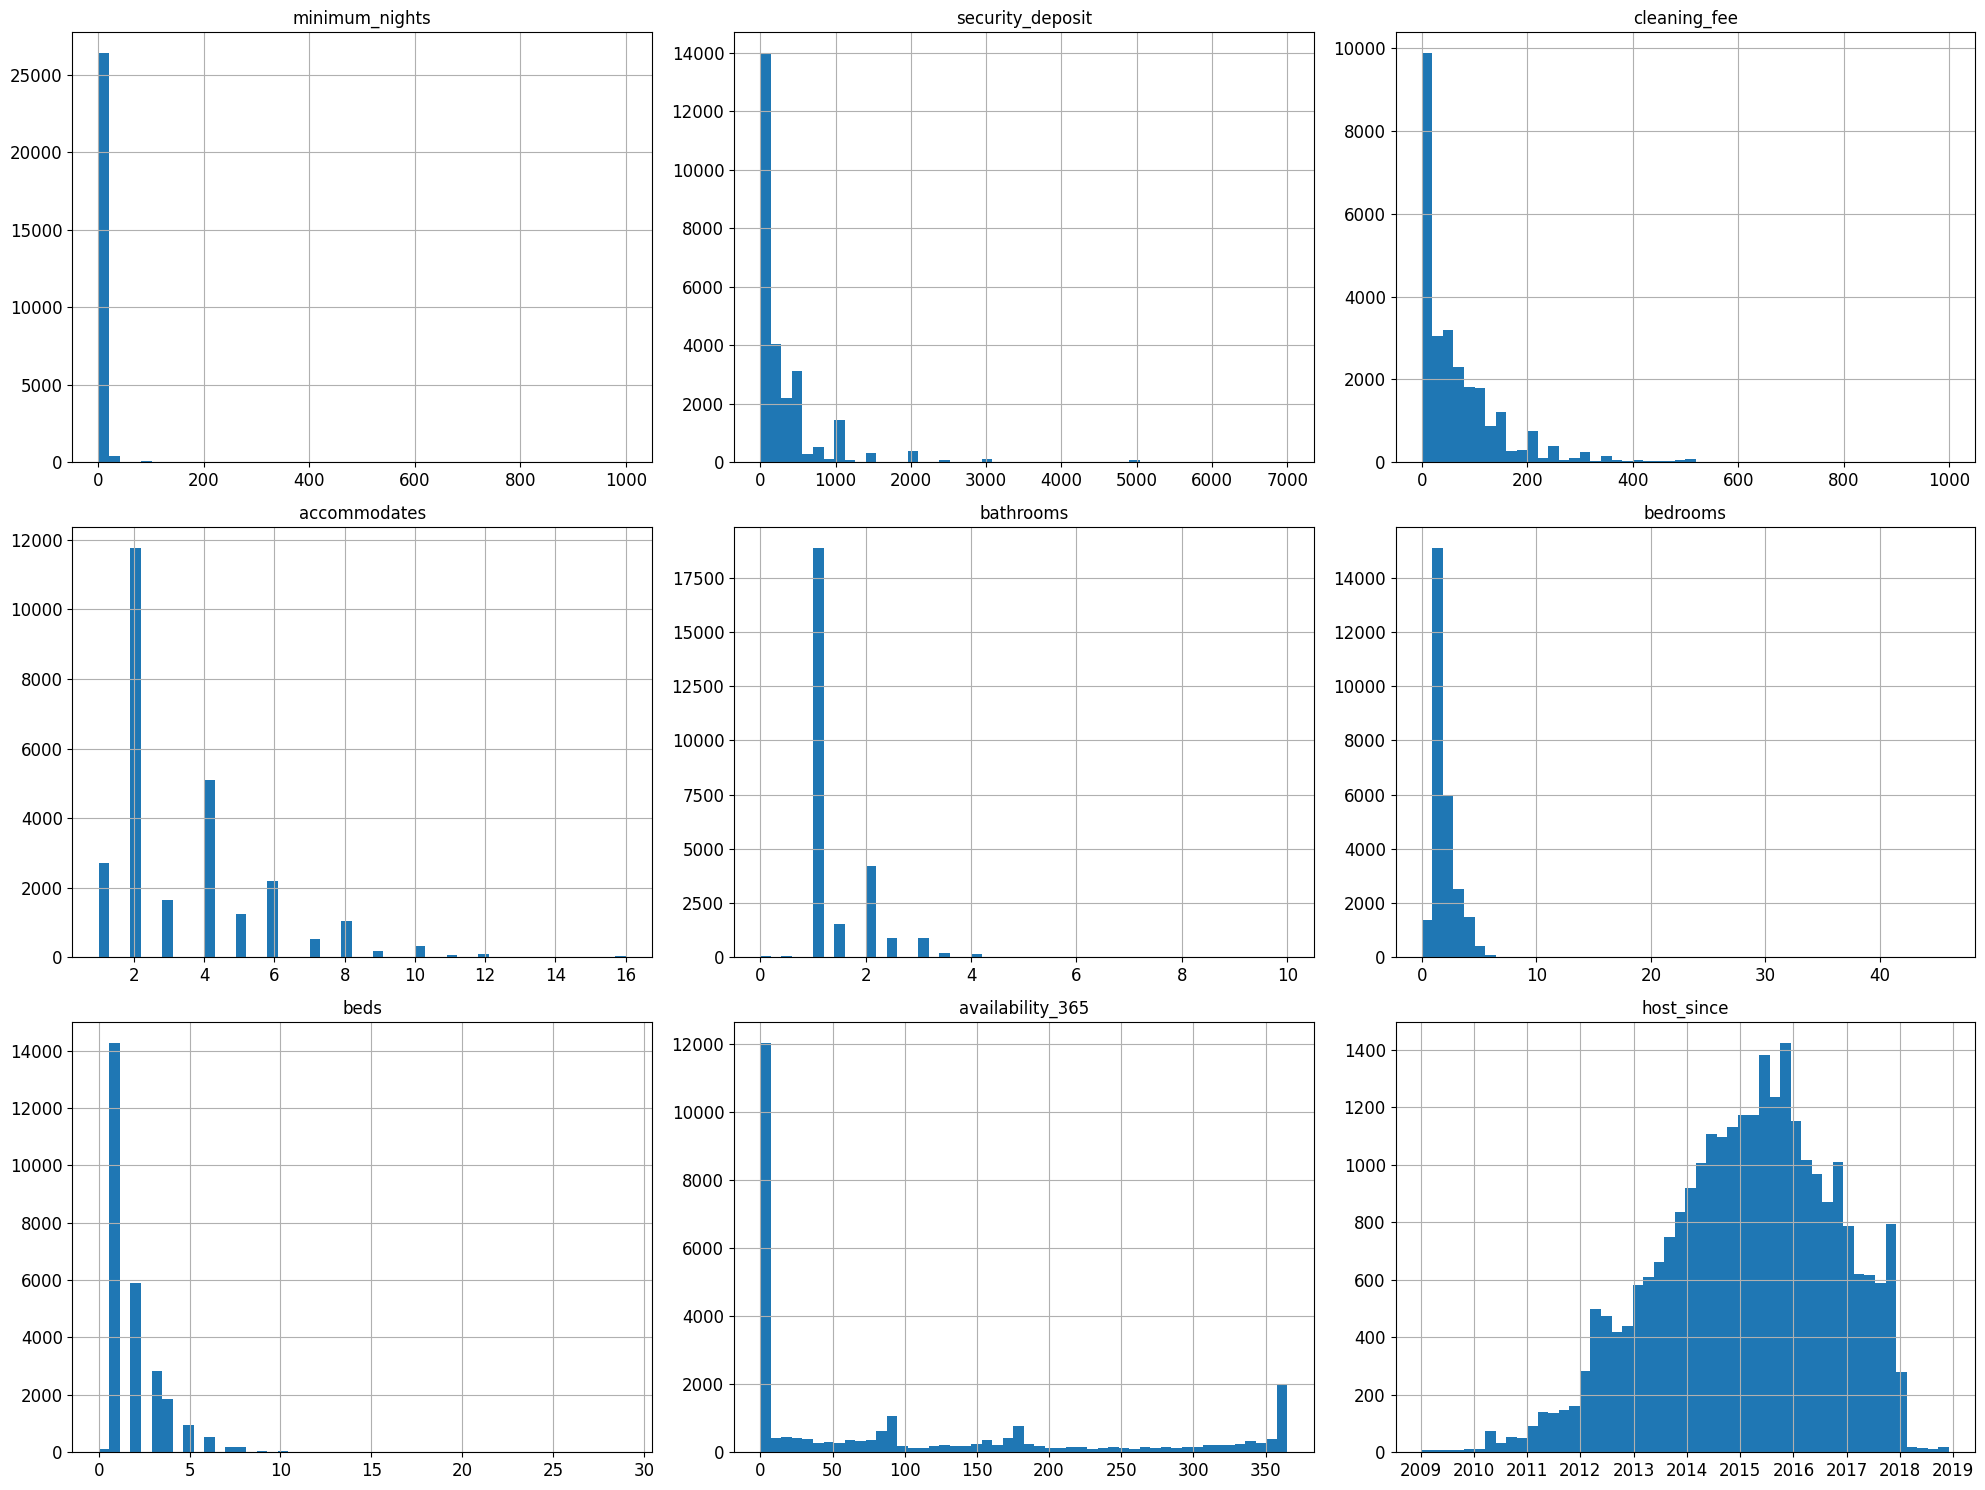

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

try:
    df.iloc[:,6:].hist(bins=50, figsize=(20,15))
    save_fig("attribute_histogram_plots")
    plt.show()
except AttributeError:
    pass


In [ ]:
## Even though our customer, sepecifcally wants information about..
## .. Bondi the addition of other areas will help the final prediction

df["city"].value_counts().head(10)

,count
city,
Bondi Beach,1671
Manly,958
Surry Hills,919
Bondi,785
Randwick,684
Sydney,682
Coogee,675
Darlinghurst,660
North Bondi,629


In [ ]:
## For this taks we will keep the top 20 Sydney locations

list_of_20 = list(df["city"].value_counts().head(10).index)
df = df[df["city"].isin(list_of_20)].reset_index(drop=True)

In [ ]:
df["property_type"].value_counts()

,count
property_type,
Apartment,5970
House,1497
Townhouse,271
Condominium,115
Loft,59
Guest suite,44
Other,33
Hostel,30
Bed and breakfast,25


In [ ]:
## Remove rare occurences in categories as is necessary for..
## .. the eventaul cross validation step, the below step is somewhat ..
## .. similar for what has been done with cities above

item_counts = df.groupby(['property_type']).size()
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

In [ ]:
df = df[~df["property_type"].isin(rare_items)].reset_index(drop=True)

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), "train +", len(test_set), "test")

6486 train + 1621 test


In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [ ]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [ ]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [ ]:
df_with_id = df.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [ ]:
df_with_id["id"] = df["longitude"] * 1000 + df_with_id["latitude"]
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "id")

In [ ]:
test_set.head()

,index,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,id
0,0,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,285,t,f,2009-03-12,strict_14_with_grace_period,151182.660345
4,4,130.0,Bondi Beach,151.273084,-33.891846,95.0,119,4,200.0,60.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,94,t,t,2012-01-18,strict_14_with_grace_period,151239.192454
5,5,111.0,Sydney,151.268865,-33.885690,89.0,11,4,0.0,100.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,14,f,f,2010-12-14,strict_14_with_grace_period,151234.979210
9,9,990.0,Coogee,151.260116,-33.914816,98.0,13,7,3000.0,0.0,12,5.0,6.0,6.0,Villa,Entire home/apt,33,t,f,2011-10-02,strict_14_with_grace_period,151226.201484
12,12,202.0,Bondi,151.268418,-33.895158,91.0,90,1,1000.0,150.0,4,1.0,2.0,2.0,Apartment,Entire home/apt,204,f,f,2011-03-31,strict_14_with_grace_period,151234.523342


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
4084,68.0,North Bondi,151.279684,-33.884092,93.0,3,7,150.0,0.0,2,2.5,1.0,1.0,House,Private room,4,t,f,2016-08-18,strict_14_with_grace_period
965,128.0,Surry Hills,151.212610,-33.891416,100.0,4,5,690.0,99.0,4,1.0,2.0,2.0,Townhouse,Entire home/apt,173,t,t,2014-10-31,moderate
8100,115.0,Darlinghurst,151.217882,-33.874271,98.0,8,2,0.0,30.0,3,1.0,1.0,1.0,Apartment,Entire home/apt,12,f,f,2017-04-02,moderate
3882,125.0,Sydney,151.204837,-33.875924,NaN,0,2,150.0,50.0,4,1.0,1.0,3.0,Other,Shared room,363,f,f,2014-12-01,flexible
1010,250.0,North Bondi,151.274298,-33.885652,100.0,4,2,0.0,80.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,363,t,f,2012-09-29,strict_14_with_grace_period


The models that would be used in this project can't read textual data, thus we have to turn text categories into numeric categories. The code below will create city codes, this time for the purpose of statified sampeing.


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ["city"]:
    df[col+"_code"] = le.fit_transform(df[col])


In [ ]:
##  Similar to above encoding, here we encode binary 1, 0 for t and f.

df["host_identity_verified"] = df["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

## we will stratify according to city

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["city_code"]):
    del df["city_code"]
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
## Average price per area
strat_test_set.groupby("city")["price"].mean()

,price
city,
Bondi,198.745223
Bondi Beach,199.879880
Coogee,196.574627
Darlinghurst,184.700000
Manly,223.447368
Newtown,117.938776
North Bondi,248.857143
Randwick,178.072993
Surry Hills,175.732240


# Discover and visualize the data to gain insights

In [ ]:
traval = strat_train_set.copy() ##traval - training and validation set

Saving figure bad_visualization_plot


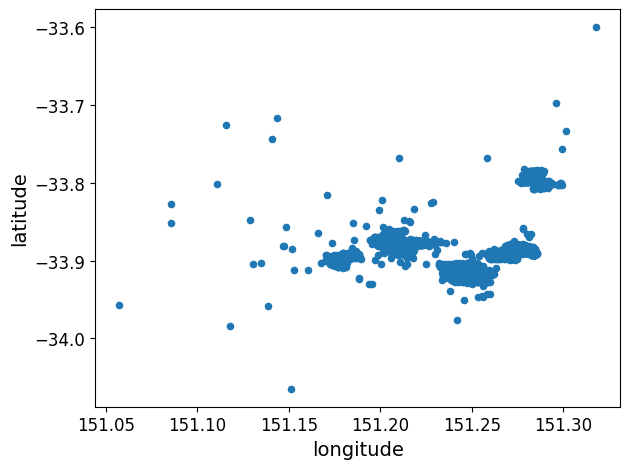

In [ ]:
traval.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


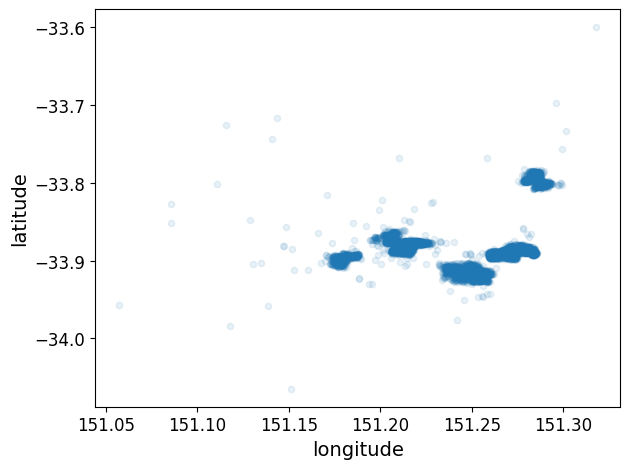

In [ ]:
traval.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

In [ ]:
traval_co = traval[(traval["longitude"]>151.16)&(traval["latitude"]<-33.75)].reset_index(drop=True)

traval_co = traval_co[traval_co["latitude"]>-33.95].reset_index(drop=True)

traval_co = traval_co[traval_co["price"]<600].reset_index(drop=True)

Saving figure housing_prices_scatterplot


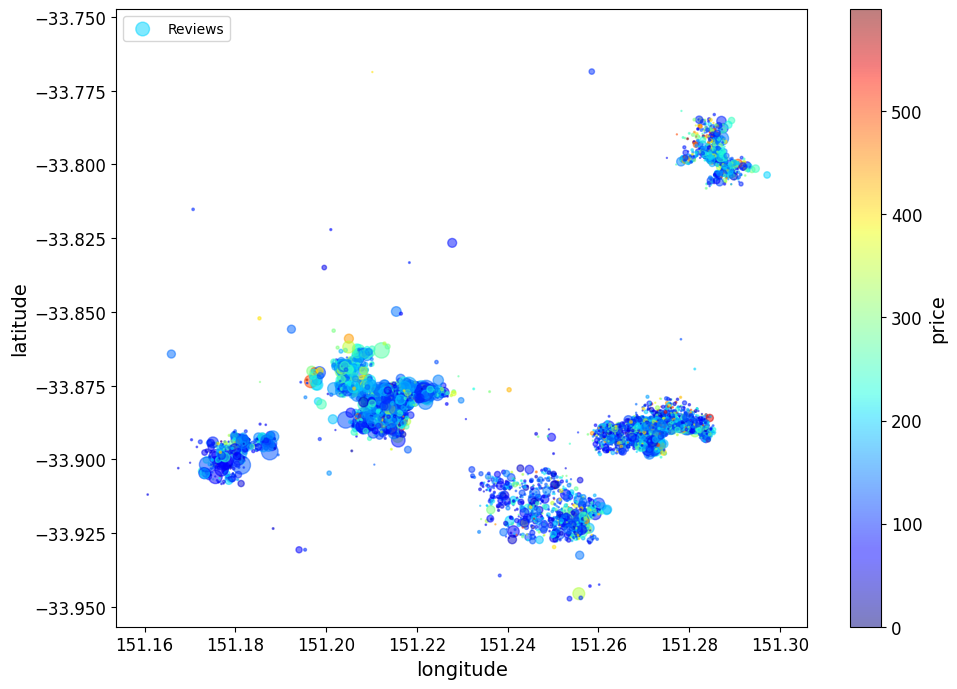

In [ ]:
traval_co.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=traval_co["number_of_reviews"]/2, label="Reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [ ]:
import pandas as pd

# Assume traval is your DataFrame
numeric_traval = traval.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_traval.corr()

corr_matrix


,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost
price,1.000000,0.157902,0.131160,0.067066,-0.064011,0.022103,0.469423,0.529834,0.674368,0.553773,0.668963,0.582378,0.148263,0.048821,-0.016695
longitude,0.157902,1.000000,0.300875,0.046203,-0.219291,0.008496,0.076216,0.067458,0.088599,0.014081,0.158359,0.090013,-0.024410,0.017378,-0.098048
latitude,0.131160,0.300875,1.000000,-0.006279,0.005813,0.008439,0.071935,0.060915,0.073440,0.058784,0.046626,0.068230,0.067270,-0.004305,0.016147
review_scores_rating,0.067066,0.046203,-0.006279,1.000000,0.037707,0.007951,0.030690,0.008525,-0.034470,0.042580,0.043310,-0.049052,-0.031196,0.040461,0.165590
number_of_reviews,-0.064011,-0.219291,0.005813,0.037707,1.000000,-0.057559,-0.010459,0.027369,0.059822,-0.055478,-0.095475,0.029349,0.271525,0.081821,0.384543
minimum_nights,0.022103,0.008496,0.008439,0.007951,-0.057559,1.000000,0.078160,0.036996,0.009321,0.018838,0.033779,0.018626,0.013307,-0.018161,-0.040309
security_deposit,0.469423,0.076216,0.071935,0.030690,-0.010459,0.078160,1.000000,0.508427,0.369833,0.310215,0.353373,0.318991,0.127233,0.085009,0.022787
cleaning_fee,0.529834,0.067458,0.060915,0.008525,0.027369,0.036996,0.508427,1.000000,0.517423,0.362423,0.485936,0.444197,0.240212,0.095461,0.042556
accommodates,0.674368,0.088599,0.073440,-0.034470,0.059822,0.009321,0.369833,0.517423,1.000000,0.505167,0.785395,0.863046,0.141917,0.068506,-0.000112
bathrooms,0.553773,0.014081,0.058784,0.042580,-0.055478,0.018838,0.310215,0.362423,0.505167,1.000000,0.561778,0.492503,0.022877,0.016287,-0.029079


In [ ]:
corr_matrix["price"].sort_values(ascending=False)

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["price", "accommodates", "bedrooms",
              "cleaning_fee","review_scores_rating"]
scatter_matrix(traval[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [ ]:
traval.plot(kind="scatter", x="accommodates", y="price",
             alpha=0.1)
save_fig("income_vs_house_value_scatterplot")

In [ ]:
traval.head()

In [ ]:
#### Some Feature Engineering

In [ ]:
traval["bedrooms_per_person"] = traval["bedrooms"]/traval["accommodates"]
traval["bathrooms_per_person"] = traval["bathrooms"]/traval["accommodates"]
traval['host_since'] = pd.to_datetime(traval['host_since'])
traval['days_on_airbnb'] = (pd.to_datetime('today') - traval['host_since']).dt.days

# Prepare the data for Machine Learning algorithms

In [ ]:
## Here I will forget about traval and use a more formal way of introducing...
## ..preprocessin using pipelines

In [ ]:
X  = traval.copy().drop("price", axis=1) # drop labels for training set

In [ ]:
sample_incomplete_rows = X[X.isnull().any(axis=1)].head()
print(sample_incomplete_rows.shape)
sample_incomplete_rows

In [ ]:
# Rows Remove
sample_incomplete_rows.dropna(subset=["review_scores_rating"])    # option 1

In [ ]:
# Columns Remove
sample_incomplete_rows.drop(["review_scores_rating"], axis=1)       # option 2

In [ ]:
median = X["review_scores_rating"].median()
sample_incomplete_rows["review_scores_rating"].fillna(median, inplace=True) # option 3

sample_incomplete_rows

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Remove the text attribute because median can only be calculated on numerical attributes:

In [ ]:
cat_cols = ["city","cancellation_policy","host_since","room_type","property_type","host_since"]
X_num = X.drop(cat_cols, axis=1)
# alternatively: X_num = X.select_dtypes(include=[int, float])

In [ ]:
imputer.fit(X_num)

In [ ]:
imputer.statistics_

Check that this is the same as manually computing the median of each attribute:

In [ ]:
X_num.median().values

Transform the training set:

In [ ]:
X_num_np = imputer.transform(X_num)

In [ ]:
X_num = pd.DataFrame(X_num_np, columns=X_num.columns,
                          index = list(X_num.index.values))

In [ ]:
X_num.loc[sample_incomplete_rows.index.values]

In [ ]:
imputer.strategy

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [ ]:
X_cat = X.select_dtypes(include=[object])
X_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X_cat.head()

In [ ]:
ordinal_encoder = OrdinalEncoder()
X_cat_enc = ordinal_encoder.fit_transform(X_cat)
X_cat_enc[:10]

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [ ]:
X_cat_1hot.toarray()

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

In [ ]:
cat_encoder.categories_

Let's create a custom transformer to add extra attributes:

#### **Now let's create a pipeline for preprocessing that is built on the techniques we used up and till now and introduce some new pipeline techniques.**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Receive numpy array, convert to pandas for features, convert back to array for output.

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, popularity = True, num_cols=[]): # no *args or **kargs
        self.popularity = popularity
        self.num_cols = num_cols
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):

        ### Some feature engineering
        X = pd.DataFrame(X, columns=self.num_cols)
        X["bedrooms_per_person"] = X["bedrooms"]/X["accommodates"]
        X["bathrooms_per_person"] = X["bathrooms"]/X["accommodates"]

        global feats
        feats = ["bedrooms_per_person","bathrooms_per_person"]

        if self.popularity:
            X["past_and_future_popularity"]=X["number_of_reviews"]/(X["availability_365"]+1)
            feats.append("past_and_future_popularity")

            return X.values
        else:
            return X.values


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = strat_train_set.copy().drop("price",axis=1)
Y = strat_train_set["price"]

num_cols = list(X.select_dtypes(include=numerics).columns)
cat_cols = list(X.select_dtypes(include=[object]).columns)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder(num_cols=num_cols,popularity=True)),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
from sklearn.compose import ColumnTransformer
import itertools


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

mid_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(),cat_cols ),
    ])

In [ ]:
mid_pipeline.fit(X) # this one specifically has to be fitted for the cat names
cat_encoder = mid_pipeline.named_transformers_["cat"]
sublists = [list(bas) for bas in cat_encoder.categories_]
one_cols = list(itertools.chain(*sublists))

## In this class, I will be converting numpy back to pandas

class ToPandasDF(BaseEstimator, TransformerMixin):
    def __init__(self, fit_index = [] ): # no *args or **kargs
        self.fit_index = fit_index
    def fit(self, X_df, y=None):
        return self  # nothing else to do
    def transform(self, X_df, y=None):
        global cols
        cols = num_cols.copy()
        cols.extend(feats)
        cols.extend(one_cols) # one in place of cat
        X_df = pd.DataFrame(X_df, columns=cols,index=self.fit_index)

        return X_df

def pipe(inds):
    return Pipeline([
            ("mid", mid_pipeline),
            ("PD", ToPandasDF(inds)),
        ])

params = {"inds" : list(X.index)}

X_pr = pipe(**params).fit_transform(X) # Now we have done all the preprocessing instead of
                                   #.. doing it bit by bit. The pipeline becomes
                                   #.. extremely handy in the cross-validation step.

# Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression
Y_pr = Y.copy() # just for naming convention, _pr for processed.

lin_reg = LinearRegression()
lin_reg.fit(X_pr, Y_pr)

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]
some_data_prepared = pipe(inds=list(some_data.index)).transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Compare against the actual values:

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
## Naturally, these metrics are not that fair, because it is insample.
## However the first model is linear so overfitting is less likley.
## We will look at some out of sample validation later on.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_pred = lin_reg.predict(X_pr)
lin_mse = mean_squared_error(Y, X_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y, X_pred)
lin_mae

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_pr, Y)

In [ ]:
X_pred = tree_reg.predict(X_pr)
tree_mse = mean_squared_error(Y, X_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse  ## Model is complex and overfits completely.

# Fine-tune your model

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_pr, Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(LinearRegression(), X_pr, Y,
                             scoring="neg_mean_absolute_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
## bad performance, might need some regularisation.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_pr, Y)

In [ ]:
X_pred = forest_reg.predict(X_pr)
forest_mse = mean_squared_error(Y, X_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
#might take 40 seconds

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_pr, Y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg,  X_pr, Y, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit( X_pr, Y,)
X_pred = svm_reg.predict(X_pr)
svm_mse = mean_squared_error(Y, X_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [ ]:
## 50 Seconds to run this code block.
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit( X_pr, Y)

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

print("")
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

In [ ]:
# Top five results as presented in a dataframe
pd.DataFrame(grid_search.cv_results_).head(5)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit( X_pr, Y)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
feats = pd.DataFrame()
feats["Name"] = list(X_pr.columns)
feats["Score"] = feature_importances

In [ ]:
feats.sort_values("Score",ascending=False).round(5).head(20)

In [ ]:
strat_test_set.head()

In [ ]:
### Now we can test the out of sample performance.

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = pipe(list(X_test.index)).transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

In [ ]:
final_mae = mean_absolute_error(y_test, final_predictions)

In [ ]:
final_mae ## not too bad

In [ ]:
## Value Estimation for Client

In [ ]:
df_client = pd.DataFrame.from_dict(dict_client, orient='index').T

In [ ]:
df_client

In [ ]:
df_client = pipe(list(df_client.index)).transform(df_client)

In [ ]:
client_pred = final_model.predict(df_client)

In [ ]:
### Client should be charging about $150 more.
print('\x1b[1;31m'+str(client_pred[0])+'\x1b[0m')
print('\x1b[1;31m'+str(-500)+'\x1b[0m')
print('\x1b[1;31m'+"= "+str(client_pred[0]-500)+'\x1b[0m')

#### We can compute a crude 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

In [ ]:
y_test.min()

In [ ]:
## This calculates the RMSE confidence interval

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

## MSE
MSE_int = np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

print("MSE Interval: ", MSE_int)


We could also compute the interval manually like this:

In [ ]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

In [ ]:
####### What about for MAE

absolute_errors = (final_predictions - y_test).abs()
mean = absolute_errors.mean()
m = len(absolute_errors)

MAE_int = stats.t.interval(confidence, m - 1,
                         loc=np.mean(absolute_errors),
                         scale=stats.sem(absolute_errors))

print("MAE Interval: ", MAE_int)


# Extra material

## You can also include the parameter optimisation in a pipline

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

class Optimise(BaseEstimator, TransformerMixin):
    def __init__(self, Y=[] ): # no *args or **kargs
        self.Y = Y
    def fit(self, X_df, y=None):
        return self  # nothing else to do
    def transform(self, X_df, y=None):
        param_distribs = {
                'n_estimators': randint(low=1, high=200),
                'max_features': randint(low=1, high=8),
            }

        forest_reg = RandomForestRegressor(random_state=42)
        rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                        n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)

        rnd_search.fit(X_df, self.Y)

        return rnd_search.best_estimator_

def pipe_full(inds, Y):
    return Pipeline([
            ("first", pipe(inds)),
            ("opt", Optimise(Y)),
        ])

params = {"inds" : list(X.index),"Y" : Y}

modell = pipe_full(**params).fit_transform(X) # Now we have done all the preprocessing instead of
                                   #.. doing it bit by bit. The pipeline becomes
                                   #.. extremely handy in the cross-validation step.


In [ ]:
X_test_prepared = pipe(list(X_test.index)).transform(X_test)
X_pred = modell.predict(X_test_prepared)

In [ ]:
X_pred[:10]